In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Machine learning')
from funciones import plotDesB

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clasification

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification #datos sinteticos

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

In [ ]:
# we create 100 separable points
X, y = make_classification(n_samples = 1000, n_features=2,
                           n_classes = 3,
                           n_redundant=0, n_informative=2, n_clusters_per_class=1,
                           random_state=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

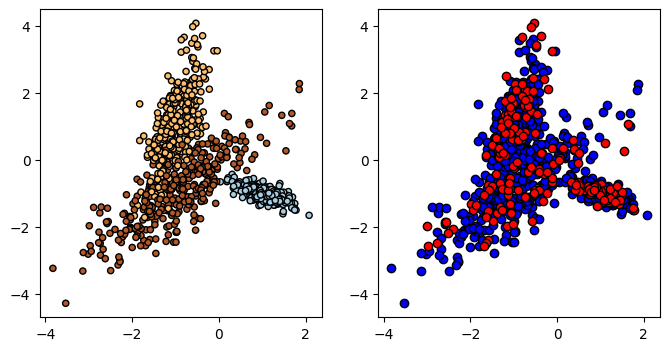

In [ ]:
# Plot train / test data
_, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].scatter(X[:,0], X[:,1], c=y, s=20, edgecolors = 'k', cmap='Paired')
axes[1].scatter(X_train[:,0], X_train[:,1], c='b', edgecolors = 'k')
axes[1].scatter(X_test[:,0], X_test[:,1], c='r', edgecolors = 'k')

In [ ]:
'''
    --> Paste your plot_2d_decision_boundaries function here!
'''
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Machine learning')
from funciones import plotDesB

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


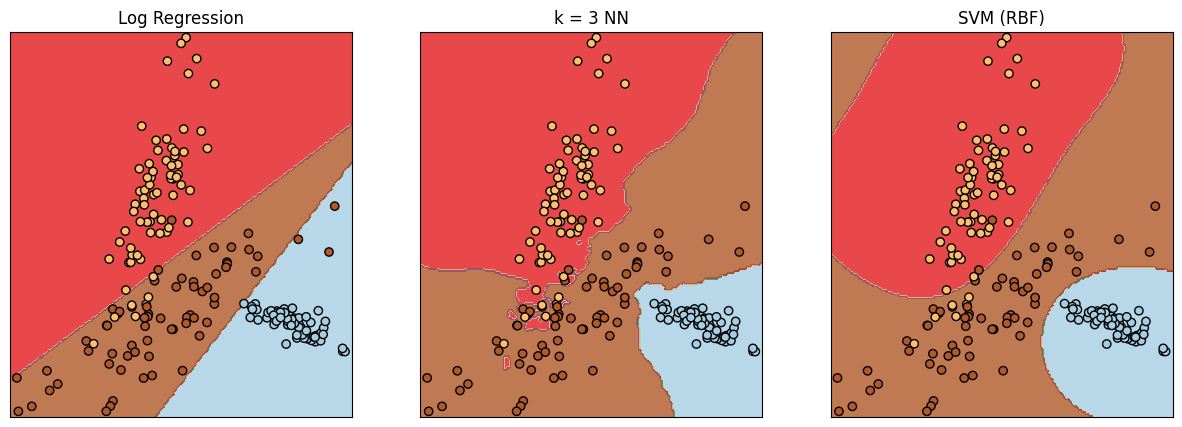

In [ ]:
models = [ LogisticRegression() , kNN(n_neighbors = 3) , SVC(kernel = 'rbf') ]
names = ['Log Regression' , 'k = 3 NN' , 'SVM (RBF)']


_, axes = plt.subplots(1,3, figsize = (15,5))
predictions = {}

# fit the models
for name, clf, ax in zip(names, models, axes):
    #
    clf.fit( X_train , y_train )
    predictions[name] = clf.predict(X_test)

    # Plot everything
    plotDesB(X_test,y_test,clf, ax=ax)
    ax.set_title(name)

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Log Regression -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.940  	   0.940  	   0.940  	   0.940  	
########----- Results for k = 3 NN -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.960  	   0.960  	   0.960  	   0.960  	
########----- Results for SVM (RBF) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.955  	   0.955  	   0.955  	   0.955  	


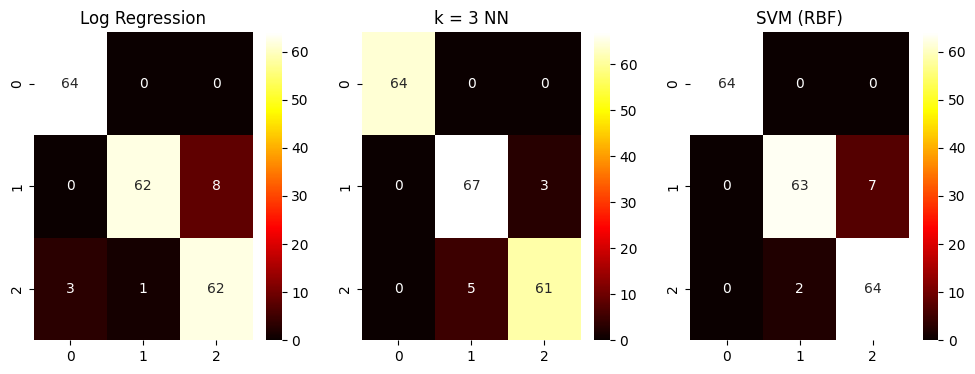

In [ ]:
_, axes = plt.subplots(1, 3 , figsize = (12,4))

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes) :
  print ("########----- Results for {0} -----########".format(name))
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title( name )

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

(1797, 64)


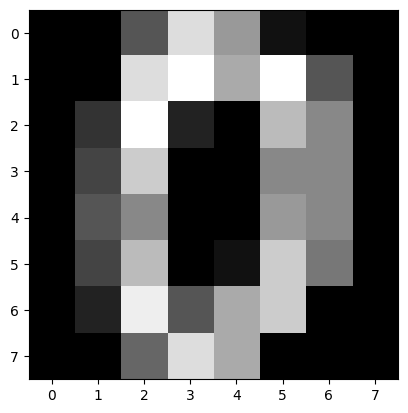

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

In [ ]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Log Regression -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.972  	   0.972  	   0.972  	   0.972  	
########----- Results for k = 3 NN -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.994  	   0.994  	   0.994  	   0.994  	
########----- Results for SVM (RBF) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.992  	   0.992  	   0.992  	   0.992  	


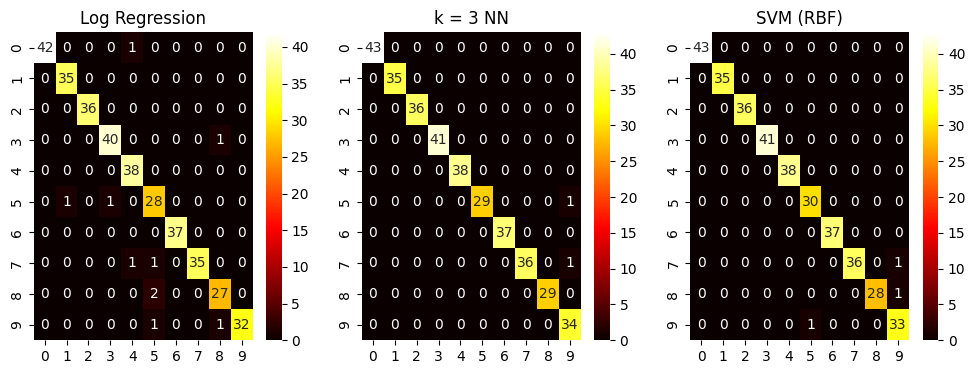

In [ ]:
models = [ LogisticRegression(max_iter=10000) , kNN(n_neighbors = 3) , SVC(kernel = 'rbf') ]
names = ['Log Regression' , 'k = 3 NN' , 'SVM (RBF)']
_, axes = plt.subplots(1, 3 , figsize = (12,4))

predictions = {}

# fit the models
for name, clf in zip(names, models):
    clf.fit( X_train , y_train )
    predictions[name] = clf.predict(X_test)

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes) :
  print (f"########----- Results for {name} -----########")
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print(f"  {accuracy:.3f}  \t   {precision:.3f}  \t   {recall:.3f}  \t   {f1:.3f}  \t")
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title( name )

plt.show()

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

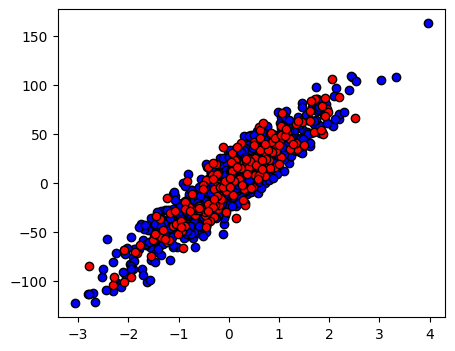

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = 1 , noise = 15 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# np.random.seed(0)
# y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_, ax = plt.subplots(figsize = (5,4))
ax.scatter(X_train, y_train, c= 'b', edgecolors='k')
ax.scatter(X_test, y_test, c= 'r', edgecolors='k')

In [ ]:
# Train a linear regression

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

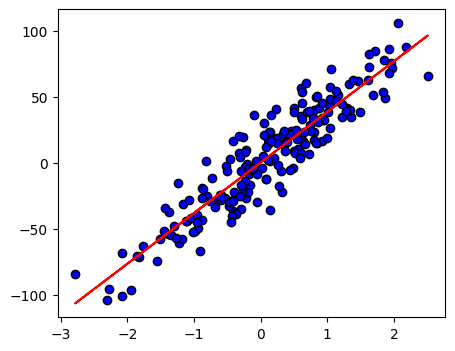

In [ ]:
predictions = linear_regression.predict(X_test)

_, ax = plt.subplots(figsize = (5,4))
ax.scatter(X_test, y_test, c='b', edgecolors = 'k')
ax.plot(X_test, predictions, c='r')

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE

mae = mean_absolute_error(y_test, predictions) #mean abs error
mse = mean_squared_error(y_test, predictions)

#print('Mae {0:0.4f}'.format(mae))

print(f'MAE {mae:0.4f} \nMSE {mse:0.4f}')

Mae 12.2933
MAE 12.2933 
MSE 236.1130
